<a href="https://colab.research.google.com/github/DanieleDePaola/UnravelMultiFormatAnalysis/blob/main/Unravel_Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following is a possible implementation for the Unravel algorithm. The original Paper can be easily found here: https://www.microsoft.com/en-us/research/uploads/prod/2020/10/OOPSLA20_Structural_Interpretation_Text_Formats.pdf

# Specs


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   42G   67G  39% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        81G   46G   36G  57% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.192
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.38
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

# 0. Import File Into Notebook
We will start analysing the results of our algorithm on a simplified versions for existing datasets. To the following address, a list of possible example file can be found and used to try the procedure. 

Link to Datasets: https://drive.google.com/drive/folders/1U1n3Z-QPuSJSKTswPGV5OpkiF3O8IPhm?usp=sharing 

The set of interpretation rules contains both Parsing, Regex and Splitters modules. This list of modules can be analysed in section 2.3 and expanded with new custom interpretation modules. 

In [ ]:
import matplotlib
import collections
import sys
import json
import re
import string
from itertools import combinations

!pip install rich

from rich.console import Console
from rich.table import Column, Table

In [ ]:
with open('NetflixMod.txt', 'r') as myfile:
    sz=myfile.read()

In [ ]:
sz

"Goli Soda 2\t15/09/2018\t{'Genre': 'drama', 'Original Language': 'Tamil', 'Director': 'Vijay Milton'}\n(T)ERROR\t30/06/2016\t{'Genre': 'horror', 'Original Language': 'English', 'Director': 'Norman J. Warren'}"

It is now time to define the partial structure implementation. The representation will be a Python class, containing a list of syntactic elements and a number used for grading different structures


In [ ]:
#Class PartialStructure
#Contains the list of syntactic elements for the structure and the grade associated with it.
#The grading will be calculated with different metrics based on ranking for the different interpretation Rules

class PartialStructure:
  def __init__(self):
    self.listSyntacticElem = []
    self.interpretationScore = 0

In [ ]:
#Note: the function checks unbalanced brackets. Source: stack overflow:https://stackoverflow.com/questions/56450268/how-to-check-unbalanced-brackets-in-python-3

def balanced(s):
    pairs = {"{": "}", "(": ")", "[": "]"}
    stack = []
    for c in s:
        if c !='{' and c !='}' and c !='[' and c !=']' and c !='(' and c !=')' :
          continue
        if c in "{[(":
            stack.append(c)
        elif stack and c == pairs[stack[-1]]:
            stack.pop()
        else:
            return False
    return len(stack) == 0


# 1. Pseudo Code

### 1.1 BFS Structure Search

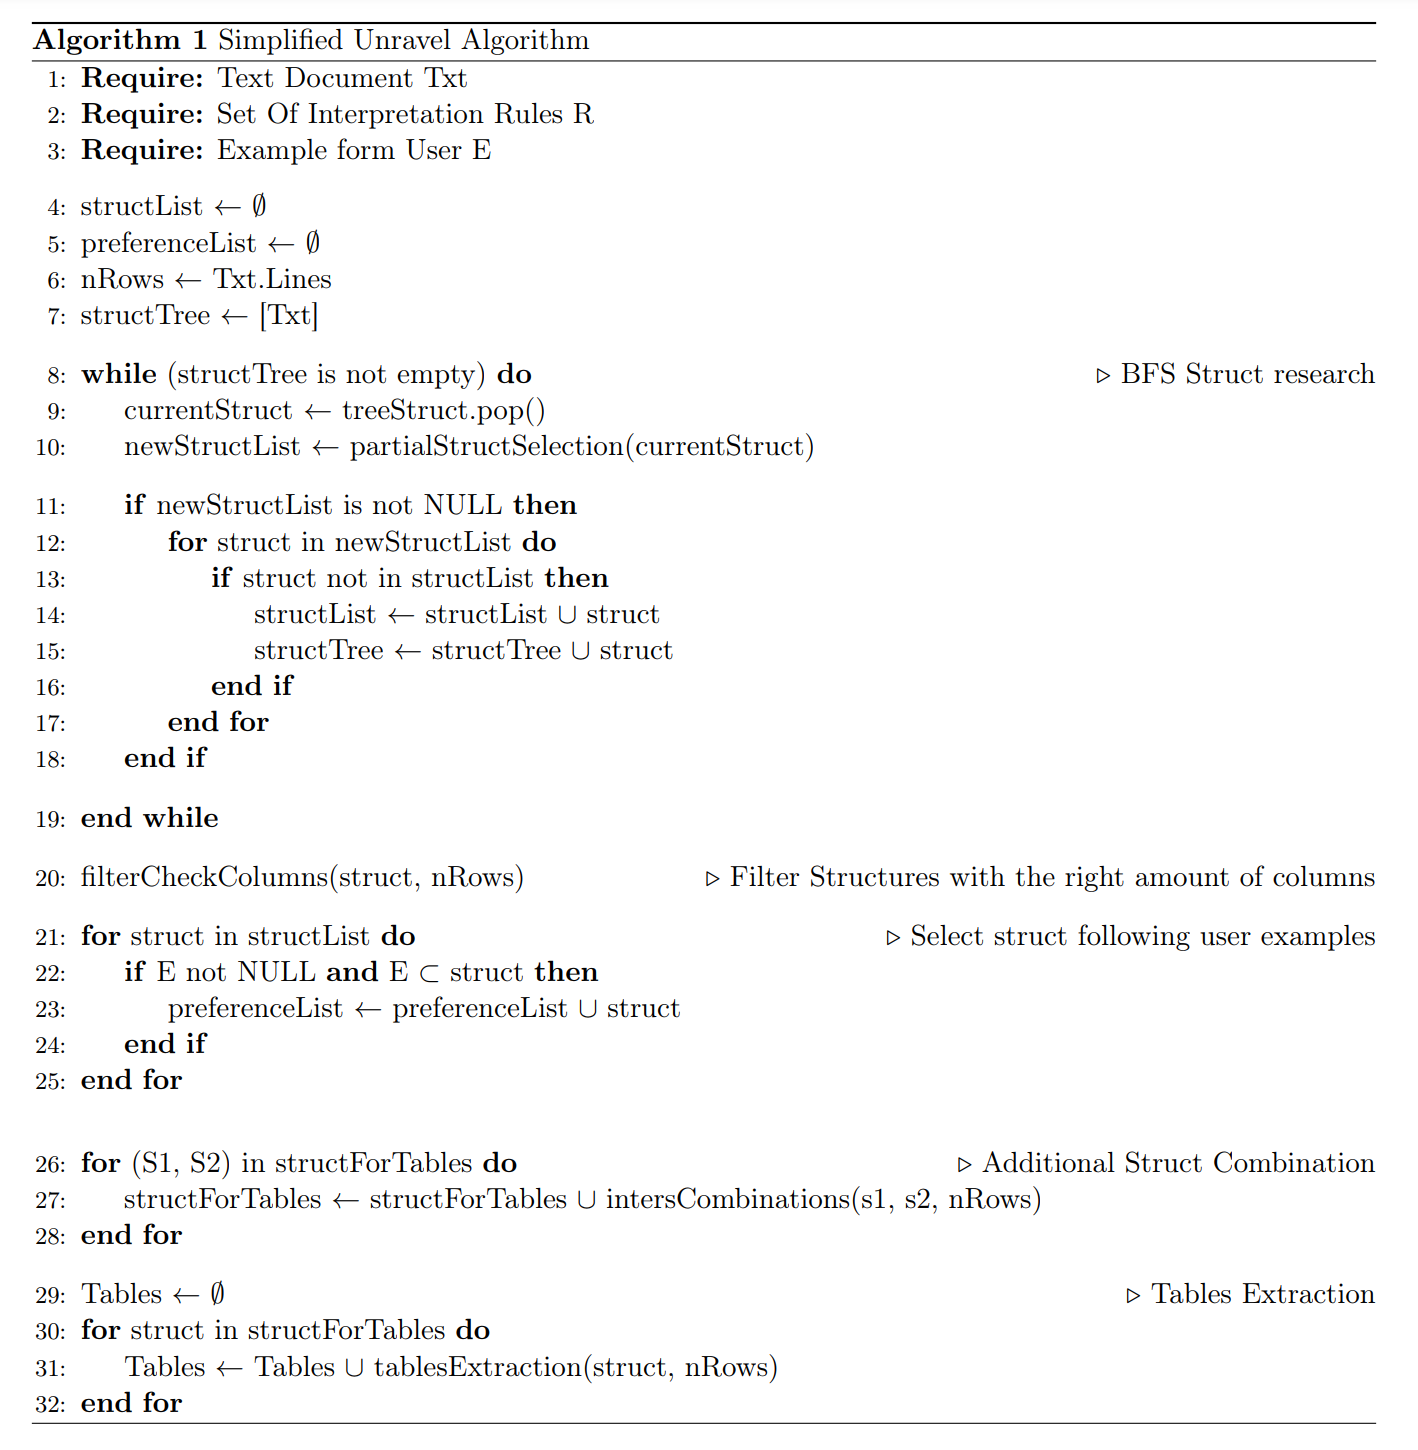

### 1.2 Partial Structure Selection

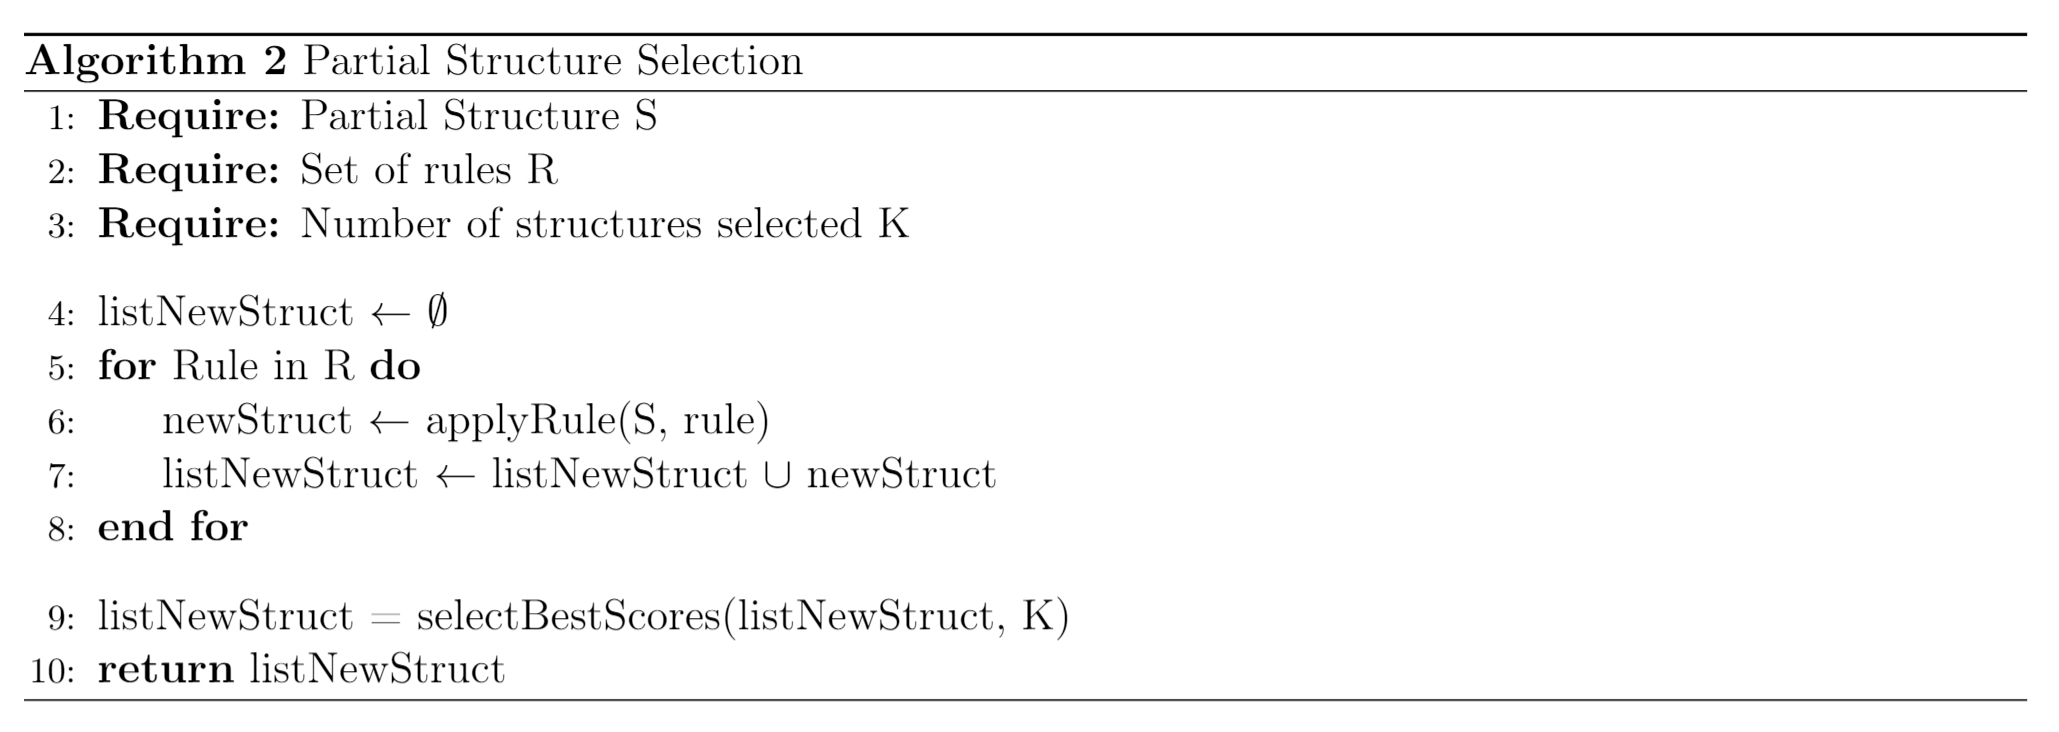

### 1.3 Intersection Combination

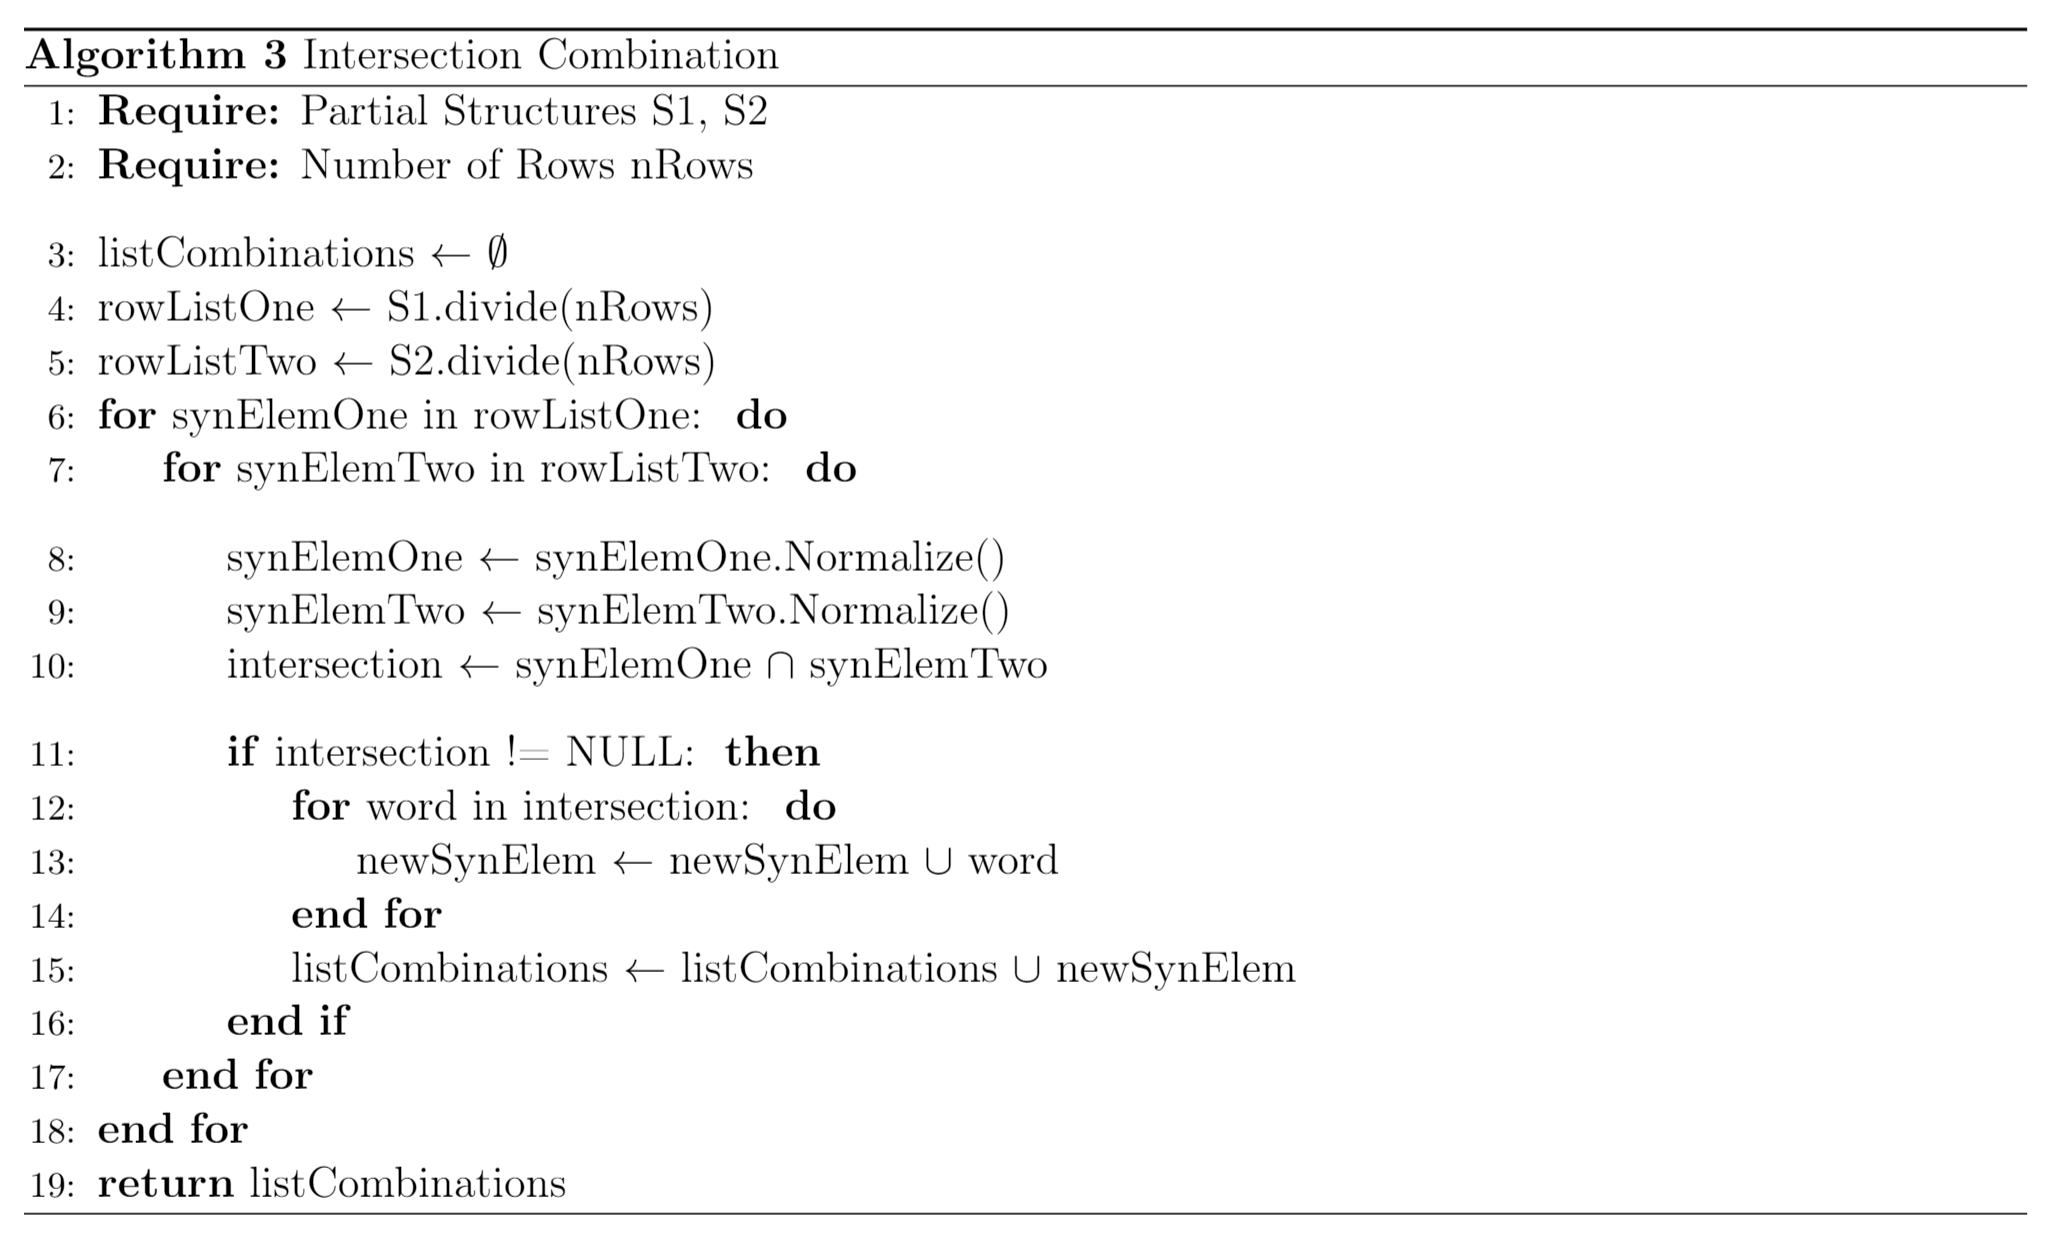

### 1.4 Filter Structures with the right amount of columns

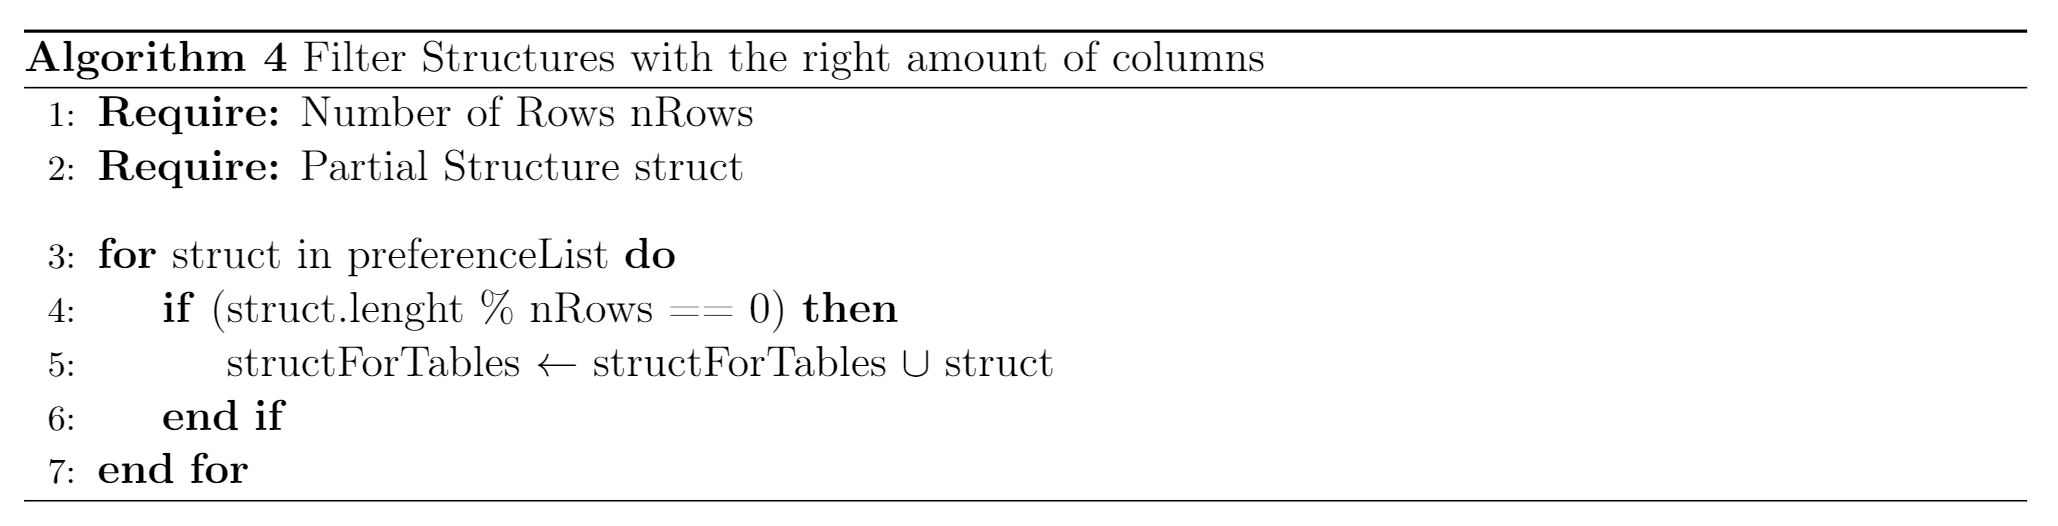

### 1.5 Interpretation Scoring System

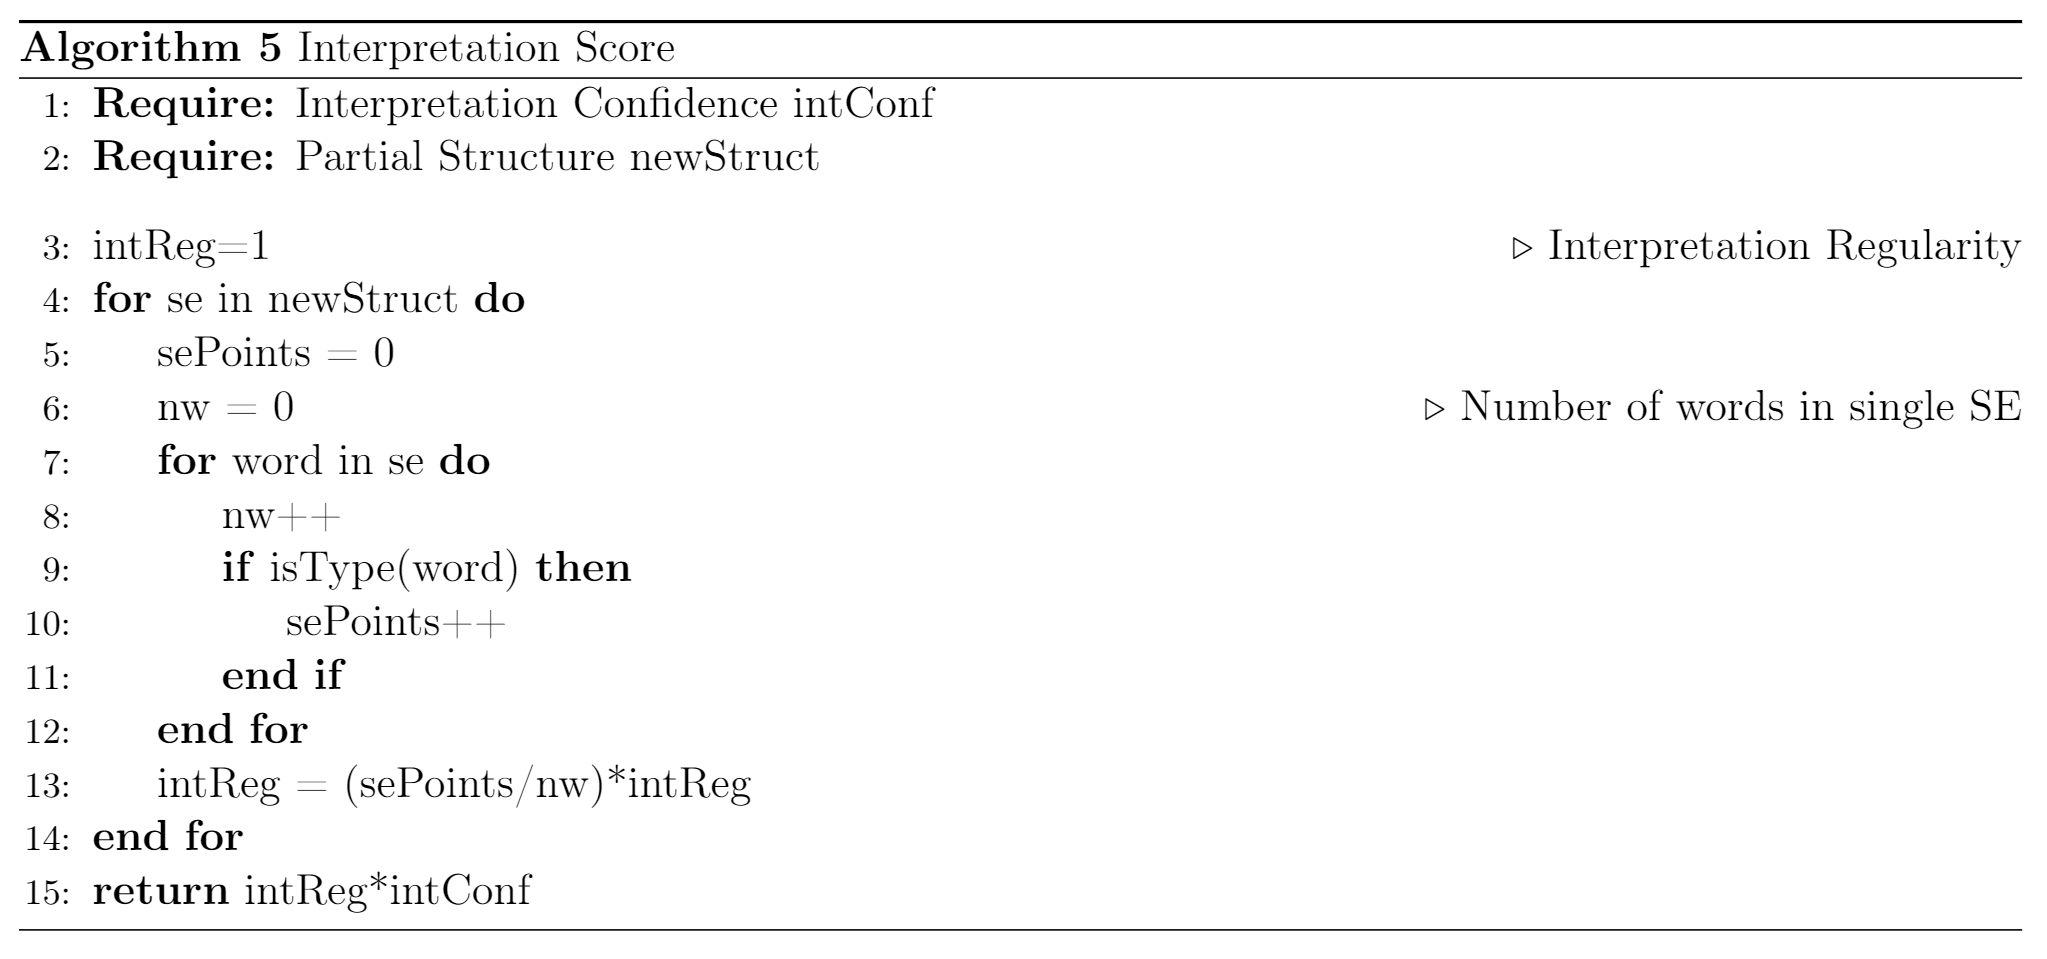

# 2. Modular Function for Partial Structure Research
Now we will create some functions for the generation of several partial structures and their evaluation. We will start from the definition of the metricsfor the evaluation of different interpretation rules, then we will program a set of modular interpretation rules, at the end  we will write partialStructureSelection(), a function to choose which set of interpretations results should be kept for each partial structure. The partialStructureSelection function will be inserted in the main body of our program, the bfs exploration.

###2.1 Interpretation Scoring Functions
We introduce here a set of criteria for the evaluation of several interpretations. For now, the calculation will rely on two different metrics: the interpretation Confidence and Regularity. While Interpretation Confidence is chosen by the User and fixed for each rule, interpretation Regularity should be calculated for every new partial structure.  

In [ ]:
#isKnownType function
#The function finds out if a string has a common data type:  
#for example a single string can be a standard IEEE timestamp, 
#an email, a number, a date, etc. 
#Optimal Regex taken from https://www.regular-expressions.info/index.html, other interesting types can be found here: https://pnp.github.io/powerplatform-samples/
#Recognised types email, ipaddress, date(e.g.2020-02-12), URLs 

#In: a string
#Out: True if the sring is a known data type, False otherwise

def isKnownType(strr):
   if (re.match('^[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,}$', strr, flags=re.IGNORECASE) or #mail
       re.match('^(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$', strr, flags=re.IGNORECASE) or #ipAddress
       re.match('^(19|20)\d\d[- /.](0[1-9]|1[012])[- /.](0[1-9]|[12][0-9]|3[01])$', strr, flags=re.IGNORECASE) or #date
       re.match('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', strr, flags=re.IGNORECASE) or #URL
       re.match('\d{4}-[01]\d-[0-3]\dT[0-2]\d:[0-5]\d:[0-5]\d\.\d+',strr, flags=re.IGNORECASE) or #iso DAtatime
       re.match('\{(?:[^{}]|(\{(?:[^{}]|())*\}))*\}', strr, flags=re.IGNORECASE) or  #JSON
       re.match('[+-]?([0-9]*[.])?[0-9]+', strr, flags=re.IGNORECASE) or #Floating Point and Integers
       re.match('(?!\w*[]:$#@^&*.[\r\n\t- }{]\w*)',strr,  flags=re.IGNORECASE)): #Plain text words not containing special char
       
     return True
   else: 
     return False


In [ ]:
#interpretationScore Function
#The function calculates the combination of regularity(aka interpretation score) and confidence for each 
#application of an interpretation rule to a partial structure. 
#In: The rule confidence andd the partial structure produced by the rule
#Out: The total interpretation score for the structure

minimalPEScore=0.000001 #Treshold to be set: since we are multipling the SE points score, for SE containing 1 single word and if the word is not a known type, we have to avoid PEScores=0, otherwise the interpretation score will go to zero.  

def interpretationScore(intConf, newStr): 
  intReg = 1
  for se in newStr.listSyntacticElem: 
    sePoints=minimalPEScore
    nw=0
    for word in se.split(" "): 
      nw+= 1
      if isKnownType(word): 
        sePoints+= 1
    intReg=(sePoints/nw)*intReg
  
  return intReg*intConf


### 2.2 Interpretation Rules Library
In this section, we introduce the implementations of the several interpretation rules that can be applied to the original document to produce several new partial structures. 

In [ ]:
#Function toBeFiltered
#The function is used to understand if a list of synctactic elements contains
#some uninteresting results as like as "true," "["
#In: a list of syntactic elem
#Out: True if the list contains the expressions to be filtered, False otherwise

#Note: the function uses a function for unbalanced brackets found on stack overflow:https://stackoverflow.com/questions/56450268/how-to-check-unbalanced-brackets-in-python-3
def toBeFiltered(listSyntacticElem): 
  for s in listSyntacticElem: 
    if not balanced(s):
      return True
    if s in string.punctuation:
      return True
  
  return False

In [ ]:
#applySplitRule function
#Function used to split a single syntax element into multiple syntax elements.
#in: a partialStructure Class
#out: a new partial Structure containing the resulting list of syntactic elements and the updated points

def applySplitRule(struct, type, intConf): 
  newPartialStructure = PartialStructure()
  #opt: insert and update a counter at runtime
  for stru in struct.listSyntacticElem:
    for syn in stru.split(type):
      syn=(syn.lstrip()).rstrip() #remove whitespace \n \t at the beg and end of string
      if syn and syn!=' ': #check not null or whitespace '' synt element
        newPartialStructure.listSyntacticElem.append(syn)
  
  

  if toBeFiltered(newPartialStructure.listSyntacticElem): #improv: filter the list suring the syn generations in the previous loop
    return 
  elif collections.Counter(newPartialStructure.listSyntacticElem)==collections.Counter(struct.listSyntacticElem):
    return 
  else: 
    newPartialStructure.interpretationScore=interpretationScore(intConf, newPartialStructure)
    return newPartialStructure
    


Let's now introduce the splitting functions for interpreting more complex structures as Json or XML. The functions will receive a partial structure class containing xml or json and output a new partial structure containing the json and xml fields in its syntactic elements. 

In [ ]:
#ApplyJsonRule function
#The function is used to extract json fields from a given partial structure
#in: a partialStructure Class
#out: a new partial Structure containing the resulting list of syntactic elements and the updated points

#IMPORTANT: the function is able to parse only well fomatted jsons: if boolean elements
#are inserted without "", the function will rise an exception

def applyJsonRule(struct, intConf): 
 
  newPartialStructure = PartialStructure()
  

  for word in struct.listSyntacticElem:
    word=str(word)
    
    try:      
      word = word.replace("'",'"')#if the string contains a dictionary, replace ' with " to make it readable from json
      jsonElem = json.loads(word)
     
      for syn in jsonElem.values(): 
        syn=(syn.lstrip()).rstrip() #remove whitespace \n \t at the beg and end of string
        if syn and syn!=' ':#check not empty syn
          syn=str(syn)
          newPartialStructure.listSyntacticElem.append(syn)
      
    except Exception as e:#SynEl is not in Json format
      newPartialStructure.listSyntacticElem.append(word)
     
  if toBeFiltered(newPartialStructure.listSyntacticElem): #improv: filter the list suring the syn generations in the previous loop
    return
  
  elif collections.Counter(newPartialStructure.listSyntacticElem)==collections.Counter(struct.listSyntacticElem):
    return 
  
  else: 
    newPartialStructure.interpretationScore=interpretationScore(intConf, newPartialStructure)
    return newPartialStructure

A new splitting rule can be added for XML interpretation. As always we transform a sigle partial structure into a new partial structure containing the parsed xml fields. 

In [ ]:
#applyXmlRule function 
#The function is used to extract xml tree from a partial structure
#In: a partialStructure Class
#Out: a new partial Structure containing the resulting list of syntactic elements and the updated points
#def applyXmlRule(partStruct, points)
#Todo starting from: https://docs.python.org/3/library/xml.etree.elementtree.html

  

In [ ]:
#applyRegexRule function
#The function is used to split strings with a given RegEx
#In: a partialStructure Class
#Out: a new partial Structure containing the resulting list of syntactic elements and the updated points

def applyRegexRule(struct, regex, intConf): 
  newPartialStructure = PartialStructure()
  newListSyntacticElem=[]
  
  for word in struct.listSyntacticElem:
    listSyn=re.split(regex, word)
    listSyn=filter(None, listSyn)
    for syn in listSyn:
      syn=str(syn)
      syn=(syn.lstrip()).rstrip() #remove whitespace \n \t at the beg and end of string
      if syn and syn!=' ': #check not null '' synt element
        newListSyntacticElem.append(syn)

  if toBeFiltered(newPartialStructure.listSyntacticElem): #improv: filter the list suring the syn generations in the previous loop
    return
  elif collections.Counter(newListSyntacticElem)==collections.Counter(struct.listSyntacticElem):
    return 
  else: 
    newPartialStructure.listSyntacticElem=newListSyntacticElem
    newPartialStructure.interpretationScore=interpretationScore(intConf, newPartialStructure)
    return newPartialStructure
  



### 2.3 Application and selection of different Interpretation Rules
We will now define the order of possible interpreters which should be applied at each iteration. I will define this list of possible structure interpreters inside a single modular function. The following set of rules should be applied following a certain order. The sequence or the set of rules applied could be set or learned with additional methods and with possible new improvements. 

In [ ]:
#RuleApplier function
#Function used to decide which set of rules is applied to a single partial structure
#In: a partial structure class
#Out: a list of possible partial structures
#todo-> define a more intelligent strategy for applying several rules, find a way in which the user can guide

def ruleApplier(partStruct): 
 newPartialStructureList=[]

 splitOne= applySplitRule(partStruct, '\n', 0.6)
 if splitOne:
    newPartialStructureList.append(splitOne)


 splitTwo= applySplitRule(partStruct, ' ', 1)
 if splitTwo:
    newPartialStructureList.append(splitTwo)
 
 splitThree = applySplitRule(partStruct, ';', 0.2)
 if splitThree:
    newPartialStructureList.append(splitThree)
 
 #splitFour = applySplitRule(partStruct, '-', 0.1)
 #if splitFour:
 #   newPartialStructureList.append(splitFour)
 
 splitFive = applySplitRule(partStruct, '|', 0.6)
 if splitFive:
    newPartialStructureList.append(splitFive)

 splitSix = applyJsonRule(partStruct,1)
 if splitSix:
   newPartialStructureList.append(splitSix)

 splitSeven = applyRegexRule(partStruct,'(T\d*:\d*:\d*\.\d*)', 0.9)
 if splitSeven:
   newPartialStructureList.append(splitSeven)

 splitEight = applyRegexRule(partStruct,'({.*})', 0.6)
 if splitEight:
    newPartialStructureList.append(splitEight)

 splitNine = applyRegexRule(partStruct,'"(.*?)"', 1)
 if splitNine:
    newPartialStructureList.append(splitNine)


 splitTen = applySplitRule(partStruct,'- -', 1)
 if splitTen:
    newPartialStructureList.append(splitTen)

 splitElev= applySplitRule(partStruct,'\t', 1)
 if splitElev:
    newPartialStructureList.append(splitElev)

 return newPartialStructureList


In [ ]:
#PartialStructureSelection function
#Function used to select the partial using metrics or user contribution
#In: a partial structure
#Out: a list of new partial structure deriving from the application of several interpretation rules
#Todo: filter and or combine the results, interaction with the user

K=5 #ToSET: Top K Interpretations retrieved for each Partial structure interpretation 

def partialStructureSelection(partialStruct): 
  retrievedList= ruleApplier(partialStruct)
  #the different results can be combined or filtered 
 
  selection = sorted(retrievedList, key = lambda x: x.interpretationScore, reverse = True)[:K]

  return selection
  


# 3. Partial structure exploration: Breadth First Search
Our Structure computation can now start. We will create several partial structures by first applying a breadth first search implemented using a queue. Then we will try to combine te several elements obtained to generate even more strings. 

In [ ]:
#isNewResult: 
#The function checks if a partialStructure has been already found during the computation, and it is
#then present into the list of partial structures
#In: a new partial structure newStruct and list of previously found partial structures previousStructList
#Out: True if newStruct list of syntactic elements is not equal to a previously found list in other part struct, false otherwise
def isNewResult(listOfSynEl, previousStructList):
  if not previousStructList: 
    return True
  for prevStruct in previousStructList:  
    if dict(collections.Counter(listOfSynEl)) == dict(collections.Counter(prevStruct.listSyntacticElem)):
      return False
 
  return True
    

In [ ]:
#Initialization of the partial structure research. In structList we will save the partial structures 
#found during the research. Struct tree is instead the queue by which we will implement the breadth first search 
#of the different partial structures
structList = []
structTree = []
startingStructure = PartialStructure()
startingStructure.listSyntacticElem=[sz]
structTree.append(startingStructure)


#BFS research: at each step a struct is removed from the queue with a pop. For the structure 
#several rules are applied and added to the queue and to a list of possible structures. 
#The research of different structures is performed by researching for several elemen
#todo-> combine different partial structures
while structTree: 
  currentStruct = structTree.pop(0)
  newStructList = partialStructureSelection(currentStruct)
  
  if not newStructList: #no interpretation rule in the list is aplicable to the current structure 
    continue
  else:
    for s in newStructList:
        if isNewResult(s.listSyntacticElem, structList): #Avoid to insert partial structures which have already been found 
          structList.append(s)
          structTree.append(s)
      
      

In [ ]:
structList

In [ ]:
#Print all the structures found during the BFS research, it is clear we should find a way to filter 
#more efficiently the results. In the following section, we will try to let the user interact and support
#a more efficient research. 

for m in sorted(structList, key = lambda x: x.interpretationScore, reverse = True):
  print(m.listSyntacticElem)
  print(m.interpretationScore)


['Goli Soda 2\t15/09/2018\t{"Genre": "drama", "Original Language": "Tamil", "Director": "Vijay Milton"}\n(T)ERROR\t30/06/2016\t{"Genre": "horror", "Original Language": "English", "Director": "Norman J. Warren"}']
0.9444445
['Goli Soda 2', '15/09/2018', "{'Genre': 'drama', 'Original Language': 'Tamil', 'Director': 'Vijay Milton'}\n(T)ERROR", '30/06/2016', "{'Genre': 'horror', 'Original Language': 'English', 'Director': 'Norman J. Warren'}"]
0.6805573379645647
['Goli Soda 2', '15/09/2018', '{"Genre": "drama", "Original Language": "Tamil", "Director": "Vijay Milton"}\n(T)ERROR', '30/06/2016', '{"Genre": "horror", "Original Language": "English", "Director": "Norman J. Warren"}']
0.6805573379645647
['Goli Soda 2', '15/09/2018', 'drama', 'Tamil', 'Vijay Milton', '(T)ERROR', '30/06/2016', 'horror', 'English', 'Norman J. Warren']
0.6666722222428331
['Goli Soda 2\t15/09/2018', 'drama', 'Tamil', 'Vijay Milton', '(T)ERROR\t30/06/2016', 'horror', 'English', 'Norman J. Warren']
0.6666708889003886
[


# 4. Interaction with the user: example
The user should have the possibility to propose some examples to guide the algorithm through the research of the desired partial structure. 
We will now rewrite the previous research and try to improve our results through the user cntribution. 


In [ ]:
#Ask to the user to insert an example or part of an example using the spacebar separator
#between the desired fields, 

print("Hello user, you can help the Unravel algorithm to recognise different text formats.\nInsert an example of row, or just part of an example.\nSeparate the fields with a space, press enter to continue: ")

example = input()
userExample = example.split(' ')
userExample

Hello user, you can help the Unravel algorithm to recognise different text formats.
Insert an example of row, or just part of an example.
Separate the fields with a space, press enter to continue: 



['']

In [ ]:
#Verify Example function. The function verifies whether the example given by the user is similar 
#to a given partial structure syntactic list of terms. 
#In: a partial struct, a list of syntactic terms given by the user 
#Out: True if the partial struct has a list of syntactic elements whose lenght is equal to the one proposed by the user

def verifyExample(discoveredStruct, userExample): 
  if not any((len(s1) != len(s2) for s1,s2 in zip(discoveredStruct.listSyntacticElem,userExample))):
    return True
  else: 
    return False

  

In [ ]:
#Initialization of the partial structure research. In structList we will save the partial structures 
#found during the research. Struct tree is instead the queue by which we will implement the breadth first search 
#of the different partial structures
structList = []
structTree = []
startingStructure = PartialStructure()
startingStructure.listSyntacticElem.append(sz)
structTree.append(startingStructure)
numberOfRows=len(sz.split('\n'))


#BFS research: at each step a struct is removed from the queue with a pop. For the structure 
#several rules are applied and added to the queue and to a list of possible structures. 
#The research of different structures is performed by researching for several elemen

while structTree: 
  currentStruct = structTree.pop(0)
  newStructList = partialStructureSelection(currentStruct)
 
  if not newStructList: 
    continue
  else:
    for s in newStructList: 
      if isNewResult(s.listSyntacticElem, structList): #Avoid to insert partial structures which have already been found 
        structList.append(s)
        structTree.append(s)
      


userPreferenceList = []
if userExample[0]== '':
  userPreferenceList=structList

else: 
  for struct in structList: 
    if verifyExample(struct, userExample):
      userPreferenceList.append(struct)
      print(struct.listSyntacticElem)


Once we filtered the structures using the user preference, we will now filter again the tables by choosing the one with a numbr of fields which can be divided by the number of rows calculated above. 

In [ ]:
structForTables=[]  #the tables which will be selected will have a number of paramenters which can be divided for the number of rows 
for struct in userPreferenceList: 
    if (len(struct.listSyntacticElem) % numberOfRows) == 0: 
      structForTables.append(struct)




In [ ]:
for st in sorted(structForTables, key = lambda x: x.interpretationScore, reverse = True): 
  print(st.listSyntacticElem)
  print(st.interpretationScore)

['Goli Soda 2', '15/09/2018', 'drama', 'Tamil', 'Vijay Milton', '(T)ERROR', '30/06/2016', 'horror', 'English', 'Norman J. Warren']
0.6666722222428331
['Goli Soda 2\t15/09/2018', 'drama', 'Tamil', 'Vijay Milton', '(T)ERROR\t30/06/2016', 'horror', 'English', 'Norman J. Warren']
0.6666708889003886
["Goli Soda 2\t15/09/2018\t{'Genre': 'drama', 'Original Language': 'Tamil', 'Director': 'Vijay Milton'}", "(T)ERROR\t30/06/2016\t{'Genre': 'horror', 'Original Language': 'English', 'Director': 'Norman J. Warren'}"]
0.53333345333334
['Goli Soda 2\t15/09/2018\t{"Genre": "drama", "Original Language": "Tamil", "Director": "Vijay Milton"}', '(T)ERROR\t30/06/2016\t{"Genre": "horror", "Original Language": "English", "Director": "Norman J. Warren"}']
0.53333345333334
['Goli Soda 2', '15/09/2018', "{'Genre': 'drama', 'Original Language': 'Tamil', 'Director': 'Vijay Milton'}", '(T)ERROR', '30/06/2016', "{'Genre': 'horror', 'Original Language': 'English', 'Director': 'Norman J. Warren'}"]
0.408334811113141

#5. Structure Combination
In this section we are going to combine the different structures found at the previous step in order to find even more new structures. 

In [ ]:
#function to divide a list in chunks of given size taken from https://www.geeksforgeeks.org/break-list-chunks-size-n-python/

def divide_chunks(list, n):
    newList=list
    #looping till length l
    for i in range(0, len(newList), n): 
        yield newList[i:i + n]
    return list
    

In [ ]:
#joinCombination Function
#The function is used to create a new partial structure by 
#intersecting different columns from two different partial structures
#In: Two Partial structures and the number of rows in the document
#Out: A new partial structure resulting from the intersection of the two above

def joinCombination(structureOne, structureTwo, nRows): 

  #Divide struct One and Two into list of rows
  listRowsStrOne=list(divide_chunks(structureOne.listSyntacticElem, int(len(structureOne.listSyntacticElem) / nRows)))
  listRowsStrTwo=list(divide_chunks(structureTwo.listSyntacticElem, int(len(structureTwo.listSyntacticElem) / nRows)))

  listCombinedSynElem=[]
   
  for n in range(nRows):# take a row from the first str and a row from second str
    tempRowStrOne= listRowsStrOne[n]
    tempRowStrTwo= listRowsStrTwo[n]
    

    for synOne in tempRowStrOne: #Take one syn term
      for synTwo in tempRowStrTwo: 
        
        #Remove punctuation when comparing two syntactic elements
        synOne = synOne.translate(str.maketrans('','',string.punctuation))
        synTwo = synTwo.translate(str.maketrans('','',string.punctuation))

        #Use sorted sets to calculate the intersection, this implementation has a complexity of O(n*m), it could be improved
        resSyn= sorted(set(synOne.split()) & set(synTwo.split()), key=synOne.split().index)#Attention: here I split with ' ' could not work for specific cases
        
        if resSyn: #Only if intersection exists, I add the new syn el to the new list of el
            list(resSyn)
            newSynEl=''
            for subElement in resSyn:
              if not newSynEl: #
                newSynEl=subElement
              else: 
                newSynEl= newSynEl+' '+subElement
             
            listCombinedSynElem.append(newSynEl)
              
  resultStruct= PartialStructure()
  resultStruct.listSyntacticElem=listCombinedSynElem
  resultStruct.interpretationScore=0

  return resultStruct
    
  
  



In [ ]:
C=3 #ToSET: Top K Combination with best Interpretation result
combinationResult=[]
for couple in combinations(structForTables, 2): 
  combinationResult.append(joinCombination(couple[0], couple[1], numberOfRows))

for combStructure in sorted(combinationResult, key = lambda x: x.interpretationScore, reverse = True)[:C]: 
  structForTables.append(combStructure)

#6. From partial structures to tables 

Let's now create a fancy table selecting some of the previous partial structures. 

In [ ]:
from rich.console import Console
from rich.table import Column, Table

console = Console()

#Order results using the Interpretation Score
structForTables= sorted(structForTables, key = lambda x: x.interpretationScore, reverse = True)

for struct in structForTables:
 table = Table(show_header=True, header_style="bold magenta", width=90)
 columns=int(len(struct.listSyntacticElem) / numberOfRows)
 rowList = divide_chunks(struct.listSyntacticElem, columns)
 for i in range(columns):
   table.add_column(style="dim", width=40)
 
 
 for row in (rowList): 
  table.add_row(*row)

 console.print(table)

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃                 ┃                 ┃                 ┃                ┃                 ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2     │ 15/09/2018      │ drama           │ Tamil          │ Vijay Milton    │
│ (T)ERROR        │ 30/06/2016      │ horror          │ English        │ Norman J.       │
│                 │                 │                 │                │ Warren          │
└─────────────────┴─────────────────┴─────────────────┴────────────────┴─────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃                     ┃                     ┃                      ┃                     ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2         │ drama               │ Tamil                │ Vijay Milton        │
│ 15/09/2018          │                     │                      │                     │
│ (T)ERROR            │ horror              │ English              │ Norman J. Warren    │
│ 30/06/2016          │                     │                      │                     │
└─────────────────────┴─────────────────────┴──────────────────────┴─────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2     15/09/2018      {'Genre': 'drama', 'Original Language': 'Tamil',       │
│ 'Director': 'Vijay Milton'}                                                            │
│ (T)ERROR        30/06/2016      {'Genre': 'horror', 'Original Language': 'English',    │
│ 'Director': 'Norman J. Warren'}                                                        │
└────────────────────────────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2     15/09/2018      {"Genre": "drama", "Original Language": "Tamil",       │
│ "Director": "Vijay Milton"}                                                            │
│ (T)ERROR        30/06/2016      {"Genre": "horror", "Original Language": "English",    │
│ "Director": "Norman J. Warren"}                                                        │
└────────────────────────────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃                            ┃                             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2                 │ 15/09/2018                 │ {'Genre': 'drama',          │
│                             │                            │ 'Original Language':        │
│                             │                            │ 'Tamil', 'Director': 'Vijay │
│                             │                            │ Milton'}                    │
│ (T)ERROR                    │ 30/06/2016                 │ {'Genre': 'horror',         │
│                             │                            │ 'Original Language':        │
│                             │                            │ 'English', 'Director':      │
│                             │                            │ 'Norman J. Warren'}         │
└─────────────────────────────┴────────────────────────────┴─────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃                            ┃                             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2                 │ 15/09/2018                 │ {"Genre": "drama",          │
│                             │                            │ "Original Language":        │
│                             │                            │ "Tamil", "Director": "Vijay │
│                             │                            │ Milton"}                    │
│ (T)ERROR                    │ 30/06/2016                 │ {"Genre": "horror",         │
│                             │                            │ "Original Language":        │
│                             │                            │ "English", "Director":      │
│                             │                            │ "Norman J. Warren"}         │
└─────────────────────────────┴────────────────────────────┴─────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            ┃                                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2     15/09/2018                 │ {'Genre': 'drama', 'Original Language':   │
│                                            │ 'Tamil', 'Director': 'Vijay Milton'}      │
│ (T)ERROR        30/06/2016                 │ {'Genre': 'horror', 'Original Language':  │
│                                            │ 'English', 'Director': 'Norman J.         │
│                                            │ Warren'}                                  │
└────────────────────────────────────────────┴───────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            ┃                                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2     15/09/2018                 │ {"Genre": "drama", "Original Language":   │
│                                            │ "Tamil", "Director": "Vijay Milton"}      │
│ (T)ERROR        30/06/2016                 │ {"Genre": "horror", "Original Language":  │
│                                            │ "English", "Director": "Norman J.         │
│                                            │ Warren"}                                  │
└────────────────────────────────────────────┴───────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃                     ┃                     ┃                      ┃                     ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Goli Soda 2         │ 15/09/2018          │ {"Genre": "drama",   │ (T)ERROR            │
│                     │                     │ "Original Language": │                     │
│                     │                     │ "Tamil", "Director": │                     │
│                     │                     │ "Vijay Milton"}      │                     │
│ 30/06/2016          │ horror              │ English              │ Norman J. Warren    │
└─────────────────────┴─────────────────────┴──────────────────────┴─────────────────────┘

┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃        ┃        ┃        ┃        ┃        ┃        ┃        ┃        ┃        ┃       ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ Goli   │ 15/09… │ {      │ Genre  │ :      │ drama  │ ,      │ Origi… │ :      │ Tamil │
│ Soda 2 │        │        │        │        │        │        │ Langu… │        │       │
│ ,      │ Direc… │ :      │ Vijay  │ }      │ (T)ER… │ 30/06… │ horror │ Engli… │ Norm… │
│        │        │        │ Milton │        │        │        │        │        │ J.    │
│        │        │        │        │        │        │        │        │        │ Warr… │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┘

┏━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━┓
┃      ┃      ┃      ┃      ┃      ┃      ┃      ┃      ┃      ┃      ┃     ┃      ┃     ┃
┡━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━┩
│ Goli │ Gen… │ :    │ dra… │ ,    │ Ori… │ :    │ Tam… │ ,    │ Dir… │ :   │ Vij… │ }   │
│ Soda │      │      │      │      │ Lan… │      │      │      │      │     │ Mil… │     │
│ 2    │      │      │      │      │      │      │      │      │      │     │      │     │
│ 15/… │      │      │      │      │      │      │      │      │      │     │      │     │
│ {    │      │      │      │      │      │      │      │      │      │     │      │     │
│ (T)… │ Gen… │ :    │ hor… │ ,    │ Ori… │ :    │ Eng… │ ,    │ Dir… │ :   │ Nor… │ }   │
│ 30/… │      │      │      │      │ Lan… │      │      │      │      │     │ J.   │     │
│ {    │      │      │      │      │      │      │      │      │      │     │ War… │     │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴─────┴──────┴─────┘

┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━┳━━━━━┓
┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃     ┃    ┃     ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━╇━━━━━┩
│ Go… │ 15… │ {   │ Ge… │ :   │ dr… │ ,   │ Or… │ :   │ Ta… │ ,   │ Di… │ :   │ V… │ }   │
│ So… │     │     │     │     │     │     │ La… │     │     │     │     │     │ M… │     │
│ 2   │     │     │     │     │     │     │     │     │     │     │     │     │    │     │
│ (T… │ 30… │ {   │ Ge… │ :   │ ho… │ ,   │ Or… │ :   │ En… │ ,   │ Di… │ :   │ N… │ }   │
│     │     │     │     │     │     │     │ La… │     │     │     │     │     │ J. │     │
│     │     │     │     │     │     │     │     │     │     │     │     │     │ W… │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴────┴─────┘

┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━┓
┃     ┃     ┃     ┃     ┃      ┃     ┃      ┃     ┃      ┃     ┃      ┃     ┃      ┃     ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━┩
│ Go… │ {   │ Ge… │ :   │ dra… │ ,   │ Ori… │ :   │ Tam… │ ,   │ Dir… │ :   │ Vij… │ }   │
│ So… │     │     │     │      │     │ Lan… │     │      │     │      │     │ Mil… │     │
│ 2   │     │     │     │      │     │      │     │      │     │      │     │      │     │
│ 15… │     │     │     │      │     │      │     │      │     │      │     │      │     │
│ (T… │ {   │ Ge… │ :   │ hor… │ ,   │ Ori… │ :   │ Eng… │ ,   │ Dir… │ :   │ Nor… │ }   │
│ 30… │     │     │     │      │     │ Lan… │     │      │     │      │     │ J.   │     │
│     │     │     │     │      │     │      │     │      │     │      │     │ War… │     │
└─────┴─────┴─────┴─────┴──────┴─────┴──────┴─────┴──────┴─────┴──────┴─────┴──────┴─────┘